In [4]:
#'Results Score' column which represents my observed data for (Bernoulli distribution)
#successfully completed the program through it's duration=1
#Unsuccessfully completed the program prior to expiration=0

results<-c(1,1,0,1,0,0,1,0,0,0,1,0,1,1,1,1,1,0,1,0,1,1)

results
# Frequency table for 'Results Score'
freq_table <- table(results)
 

# Proportion table for better understanding
prop_table <- prop.table(freq_table)
 

# Calculate the number of trials
n <- length(results)
 
# Calculate the probability of success from observed data
p_hat <- sum(results) / n
 

freq_table
prop_table

[1] 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1

results
 0  1 
 9 13 

results
        0         1 
0.4090909 0.5909091 

In [6]:
n
p_hat=round(p_hat,2)
p_hat

[1] 22

[1] 0.59

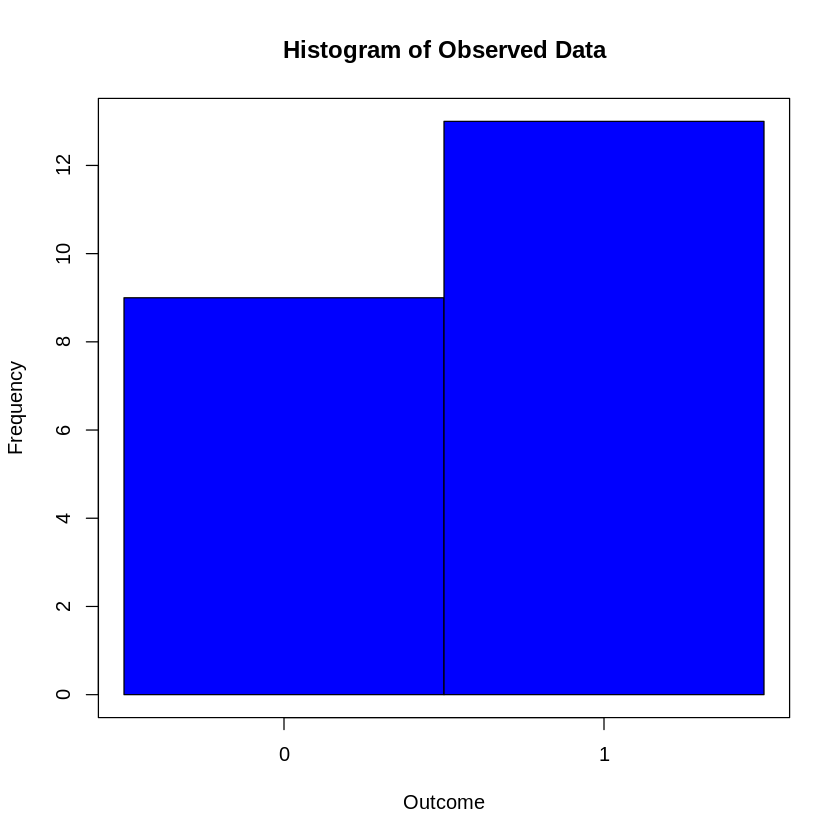

In [7]:
# Create a histogram of the observed data
hist(results, breaks=seq(-0.5, 1.5, by=1), col="blue", xlab="Outcome", ylab="Frequency", main="Histogram of Observed Data", xaxt='n', axes=FALSE)
axis(side=1, at=c(0, 1))  # Set x-axis labels to 0 and 1
axis(side=2)  # Add default y-axis
box()  # Add a box around the plot

[1] 0.2499925

[1] "Probability of failure (0 successes): 0.5"
[1] "Probability of success (1 success): 0.5"


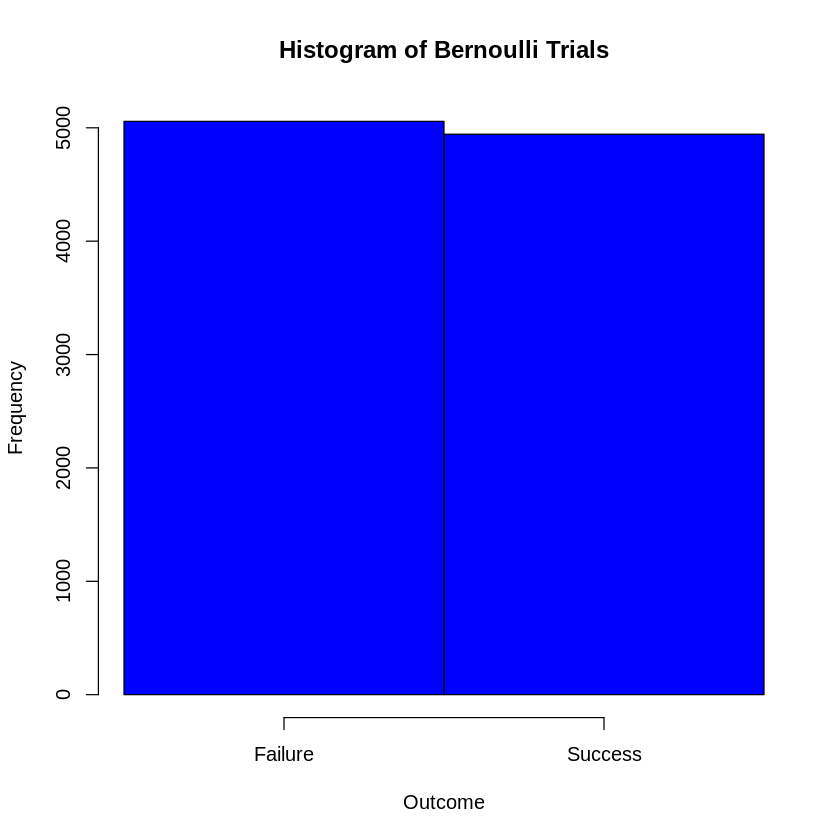

In [52]:
# Population(simulation of the true population). Theoretical data 
# Set the seed for reproducibility
set.seed(123)

# Parameters for Bernoulli trials
size <- 1      # Each trial is a Bernoulli trial (size=1)
prob <- 0.5   # Probability of success in each trial
n.1 <- 10000         # Number of trials

# Generate Bernoulli trial data (this is equivalent to simulating individual Bernoulli trials)
pop_data <- rbinom(n.1, size, prob)
pop_variance<-var(pop_data)
pop_variance
# Calculate probabilities for the outcomes of a single Bernoulli trial
y_0 <- dbinom(0, size, prob)  # Probability of 0 successes (failure)
y_1 <- dbinom(1, size, prob)  # Probability of 1 success (success)

# Print probabilities
print(paste("Probability of failure (0 successes):", y_0))
print(paste("Probability of success (1 success):", y_1))

# Display the histogram of the Bernoulli trials
hist(pop_data, breaks=seq(-0.5, 1.5, 1), main="Histogram of Bernoulli Trials", col="blue", xlab="Outcome", xlim=c(-0.5, 1.5), xaxt='n')
axis(1, at=c(0,1), labels=c("Failure", "Success"))

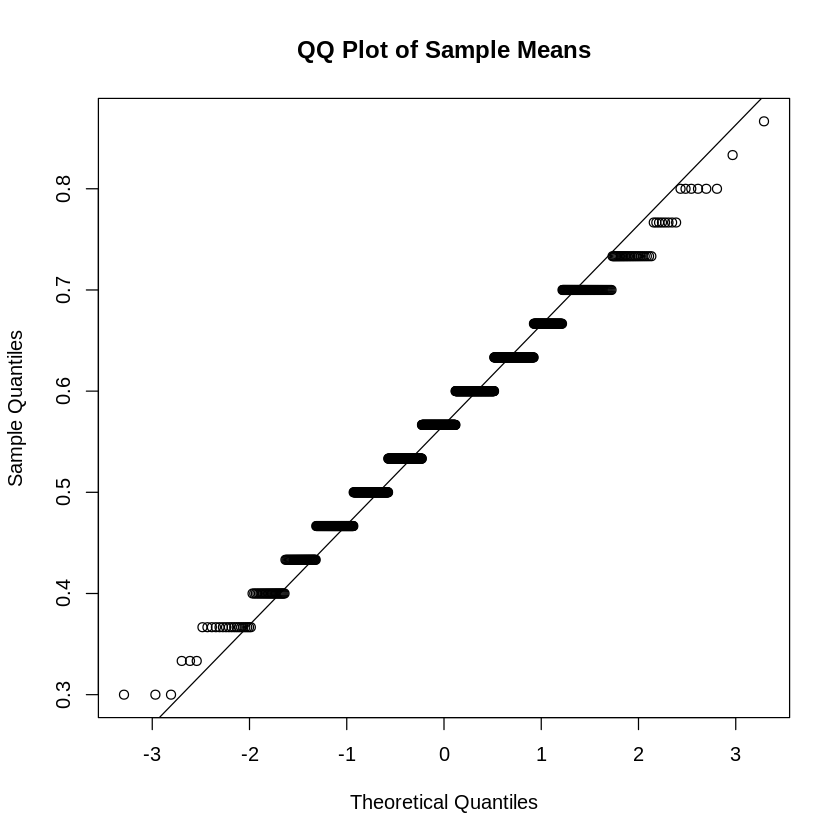

In [18]:
#checking for Normality 

# Number of resamples
num_resamples <- 1000

# Number of observations in each resample
n.2 <- length(results_30)

# Storage for sample means
sample_means <- numeric(num_resamples)

# Generate resamples and calculate sample means
set.seed(123)  # For reproducibility
for (i in 1:num_resamples) {
  sample_means[i] <- mean(sample(results_30, size = n.2, replace = TRUE))
}

# QQ plot for the sample means
qqnorm(sample_means, main = "QQ Plot of Sample Means")
qqline(sample_means)

In [53]:
# Get confidence intervals for p_hat=mean 
#theoretical population mean
mu=0.5
#sample_data(observation)
p_hat <- sum(results) / n

#unbiased sample Variance
sample_var=var(results) 
samp_sd=sqrt(sample_var)
p_hat=round(p_hat,2)
samp_sd=round(samp_sd,3)
p_hat
sample_var
samp_sd

[1] 0.59

[1] 0.2532468

[1] 0.503

In [47]:
#find population mean 
#calculate t sub-alpha, alpha=0.05 and using t-stat since n<30 and pop variance unknown
df=n-1

#95% confidence interval
alpha=0.05

cv=qt(alpha/2,df,lower.tail=FALSE)
se=samp_sd/sqrt(n)
moe=cv*se


low_interval=p_hat-moe
high_interval=p_hat+moe
low_interval=round(low_interval,4)
high_interval=round(high_interval,4)
low_interval
high_interval

[1] 0.367

[1] 0.813

#### We are 95% sure that from several simulations the population mean will be between [0.367,0.813]

In [48]:
##Reject H0 in favor of H1 if p_hat > - c or p_hat< + c for two tailed test
#HO:mu=0.50; H1 does NOT=0.50

mu=0.5



#calculate "for some c"(cut off):
c.up=mu+cv*(samp_sd/sqrt(n))
c.down=mu-cv*(samp_sd/sqrt(n))
c.up
c.down

[1] 0.7230177

[1] 0.2769823

#### Test shows: Fail to REJECT H0 in favor of H1 since p_hat is between [0.2768,0.723]

In [49]:
#calculate p_value
t=(p_hat-mu)/(samp_sd/sqrt(n))

p_value=round(2*1-(pnorm(t)),3)
p_value

[1] 1.201

#### Since p_value>alpha ,Fail to reject(accept) H0!


In [50]:
#Find Population Variance:chi-square distribution;CI
low=qchisq(alpha/2,df,lower.tail=FALSE)
up=qchisq(1-alpha/2,df,lower.tail = FALSE)
chi_low=(df*sample_var)/low
chi_up=(df*sample_var)/up
chi_low=round(chi_low,4)
chi_up=round(chi_up,4)
chi_low
chi_up

[1] 0.148

[1] 0.5106

#### We are 95% confident that from several simulation the population variance will be between [0.148, 0.5106]

In [54]:
#As you can see the population simulated variance and my sampled varieance are close:

sample_var
pop_variance

[1] 0.2532468

[1] 0.2499925

In [59]:
# Test statistic
chi_sq <-(df * sample_var) / pop_variance


# P-value
p_value <- 2 * min(pchisq(chi_sq, df), 1 - pchisq(chi_sq, df))

# Output the p-value:
p_value=round(p_value,3)
p_value

[1] 0.885

### Since the p-value > 0.05(alpha), you fail to reject the null hypothesis. This means there is no significant difference between the observed variance and the hypothesized population variance.